理論的方式（範例1）

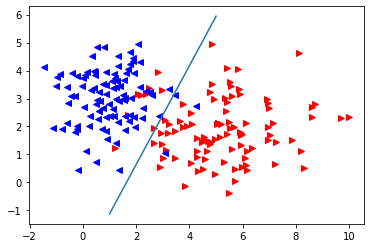

In [47]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
C1, C2 = X[y==0,:], X[y==1,:]
plt.plot(C1[:,0], C1[:,1], 'r>', label = 'Group A')
plt.plot(C2[:,0], C2[:,1],'b<', label = 'Group B')
# Estimatr the group parameters
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2
#draw classification line of LDA
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2)  @ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(1, 5, 10)
plt.plot(x, f(x))

套件方式LDA(範例1)

/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/3723785199.py:35: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)


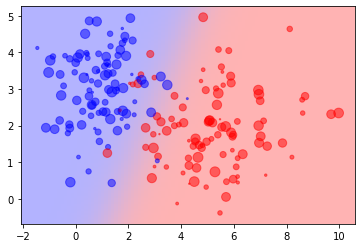

In [56]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)
area = 2 * np.random.randint(50, size = D[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小


nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])#ravel是把xx拉成一個向量,Lda.predict_proba為計算每一個點的後驗機率值且分成兩群
Z = Z[:, 1].reshape(xx.shape)#Z[:, 1]為第一群的後驗機率值
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes', cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\
    norm = colors.Normalize(0., 1.),\
    shading = 'auto', zorder = 0)


### 套件方式QDA(範例1) ###

/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/1021756505.py:33: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)


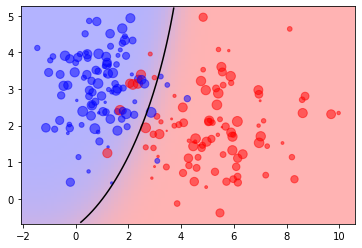

In [54]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
area = 2 * np.random.randint(50, size = D[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes', cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\
    norm = colors.Normalize(0., 1.),\
    shading = 'auto', zorder = 0)
contoursQDA = plt.contour(xx, yy, Z, [0.5],colors = 'k')

### LDA(範例2) ###

Training error for LDA =0.0900


/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/1881263651.py:42: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)
/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/1881263651.py:43: UserWarning: The following kwargs were not used by contour: 'color'
  contoursLDA=plt.contour(xx,yy,Z,[0.5],color='#F5F5DC')


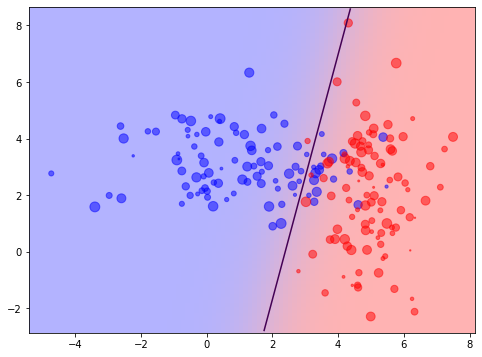

In [65]:
from IPython import get_ipython
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis

# get_ipython().magic('reset-sf') #clear all variables before run
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_2.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(figsize=(8,6))
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小

Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
intrcp=Lda.intercept_
coeffs=Lda.coef_
trainErrLDA=1-Lda.score(X,y)
print('Training error for LDA ={:.4f}'.format(trainErrLDA))

nx,ny=100,100
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,nx)
y_=np.linspace(y_min,y_max,ny)
xx,yy=np.meshgrid(x_,y_)
Z=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z=Z[:,1].reshape(xx.shape)
# Define pseudo colors#畫地板
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
plt.pcolormesh(xx,yy,Z,cmap='red_blue_classes',shading='auto',zorder=0)
plt.cm.register_cmap(cmap = cmap)
contoursLDA=plt.contour(xx,yy,Z,[0.5],color='#F5F5DC')



### QDA(範例2) ###

Training error for QDA =0.0650


/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/3128700476.py:44: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)


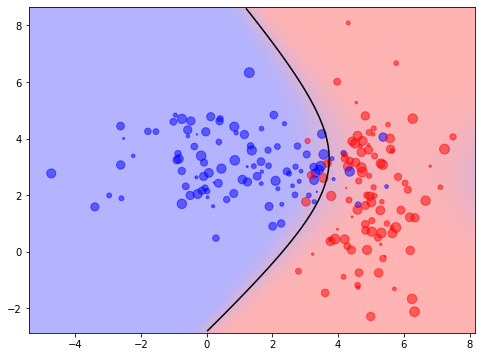

In [43]:
from IPython import get_ipython
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis

# get_ipython().magic('reset-sf') #clear all variables before run
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_2.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(figsize=(8,6))
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小



# Define pseudo colors#畫地板
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
#Qda.means
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\
    norm = colors.Normalize(0., 1.),\
    shading = 'auto', zorder = 0)
contoursQDA = plt.contour(xx, yy, Z, [0.5],colors = 'k')

In [42]:
def genmnlrvs(n1,n2,m1,m2,Cov1,Cov2): #生成資料的函數
    mvn1=multivariate_normal(mean=m1,cov=Cov1)
    mvn2=multivariate_normal(mean=m1,cov=Cov2)
    A,B=mvn1.rvs(n1),mvn2.rvs(n2)
    X=np.vstack((A,B))
    y=np.hstack((np.zeros(n1),np.ones(n2)))
    return X,y
    # X,y=genmnlrvs(200,200,np.array([0, 0]), np.array([4, 1]),Cov1 = np.array([[1, 0], [0, 1]])\
#  ,Cov2 = np.array([[1, 0.2], [0.2, 1]])) 

In [ ]:
from IPython import get_ipython
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis

# get_ipython().magic('reset-sf') #clear all variables before run
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt('/Users/liang/Documents/Github/la_2.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]



### LDA/QDA 畫在同張圖 ###

Training error for LDA =0.0900
Training error for QDA =0.0650


/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/2803797358.py:42: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)
/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/2803797358.py:43: UserWarning: The following kwargs were not used by contour: 'color'
  h1=plt.contour(xx,yy,Z,[0.5],color='#F5F5DC')
/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_1503/2803797358.py:60: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)


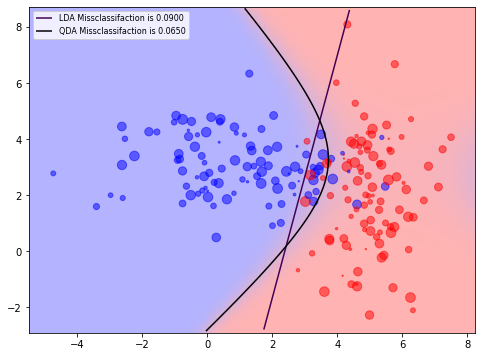

In [61]:
from IPython import get_ipython
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis \
        import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
        import QuadraticDiscriminantAnalysis

# get_ipython().magic('reset-sf') #clear all variables before run
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_2.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(figsize=(8,6))
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
        alpha = 0.5, marker = 'o' )#area代表點的的小
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
intrcp=Lda.intercept_
coeffs=Lda.coef_
trainErrLDA=1-Lda.score(X,y)
print('Training error for LDA ={:.4f}'.format(trainErrLDA))
nx,ny=100,100
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,nx)
y_=np.linspace(y_min,y_max,ny)
xx,yy=np.meshgrid(x_,y_)
Z=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z=Z[:,1].reshape(xx.shape)
# Define pseudo colors#畫地板
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
plt.pcolormesh(xx,yy,Z,cmap='red_blue_classes',shading='auto',zorder=0)
plt.cm.register_cmap(cmap = cmap)
h1=plt.contour(xx,yy,Z,[0.5],color='#F5F5DC')
#draw QDA
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
#Qda.means
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',\
    norm = colors.Normalize(0., 1.),\
    shading = 'auto', zorder = 0)
h2= plt.contour(xx, yy, Z, [0.5],colors = 'k')

h1,_=contoursLDA.legend_elements()
h2,_=contoursQDA.legend_elements()
plt.legend([h1[0],h2[0]],['LDA Missclassifaction is {:.4f}'.format(trainErrLDA),'QDA Missclassifaction is {:.4f}'.format(trainErrQDA)],fontsize=8)

Training error for QDA =0.0800


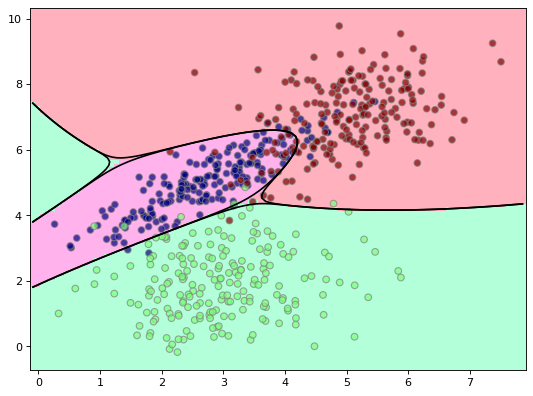

In [110]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
        
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw4_data4.txt', comments='#')#讓第一列不要讀進去
# colors1 = ['red' if i == 0 else 'blue' if i==1 else 'yellow' for i in y]     
# plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')

X=D[:,0:2]
y=D[:,2]
fig , ax =plt.subplots(dpi=80,figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='grey',cmap='jet',alpha=0.7)
# area=2*np.random.randint(50,size=D[:,0].size)
# grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
# plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
#         alpha = 0.5, marker = 'o' )#area代表點的的小
# Define pseudo colors#畫地板
# cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
#         'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
#         'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
# cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
#Qda.means
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
x1=xx.ravel()
x2=yy.ravel()
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z0 = Z[:, 0].reshape(xx.shape)
Z1 = Z[:, 1].reshape(xx.shape)
Z2 = Z[:, 2].reshape(xx.shape)

contoursQDA0 = plt.contour(xx, yy, Z0, [0.5],colors = 'k')
contoursQDA1 = plt.contour(xx, yy, Z1, [0.5],colors = 'k')
contoursQDA2 = plt.contour(xx, yy, Z2, [0.5],colors = 'k')

cmap=plt.get_cmap('gist_rainbow_r')
zz=np.array([Qda.predict(np.array([[xx,yy]])) for xx,yy in zip(x1,x2)])
Z_=zz.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z_, cmap = cmap,\
    norm = colors.Normalize(0., 2.),\
    shading = 'auto', zorder = 0,alpha=0.3)

### 訓練資料 ###

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
# ... Generate simulated data X, y
K =100
Lda=LinearDiscriminantAnalysis()
Lda.trainingError = np.zeros(K)

Lda = LinearDiscriminantAnalysis(tol = 1e-6)
for i in range(K) :
# split data into TRAINing and TESTing parts
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(X_train, y_train)
        Lda_trainingErr[i] = 
        ...
print('LDA training Error:{:.4f}'.format(Lda_trainingErr.mean()))

KNN矩陣畫法（理論法）

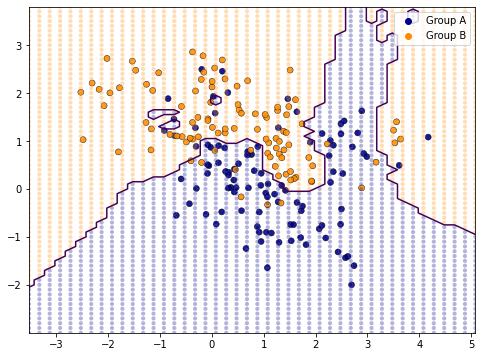

In [146]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers轉成整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
    hue = Group_name[y], palette = cmap_bold, \
        alpha = 0.9, edgecolor = 'black')
# KNN learning
K = 5
intrvl = 0.2 # grid interval
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl),np.arange(y_min, y_max, 0.1)) # grid points: matrices #xx為圍棋盤上每一個點的x座標,yy為圍棋盤上每一個點的ｙ座標矩陣
z = np.zeros(xx.size) # a vector for KNN predictions
for i in range(xx.size) :
    tmp = np.tile([xx.ravel()[i], yy.ravel()[i]], (n, 1))#tile為複製#ravel為拉開#xx.ravel=x1(new),yy.ravel=x2(new)
    d=((tmp-X)**2).sum(axis=1)
    # d = np.linalg.norm(tmp - X, axis = 1) # n distances 
    idx = np.argsort(d) # sorting K distances#argsort可以對應回原本的位置而不是值
    z[i] = np.mean(y[idx[:K]]) # average K sorted y−values
    
z = [0 if i < 0.5 else 1 for i in z]
sns.scatterplot(x = xx.ravel(), y = yy.ravel(), size = 2,\
        markers = '.', palette = cmap_bold, hue = z, \
                alpha = 0.3, legend = False)
Z = np.reshape(z, xx.shape) # reshape z to a matrix 
plt.contour(xx, yy, Z,[0.5])

KNN矩陣畫法（矩陣法）

<AxesSubplot:>

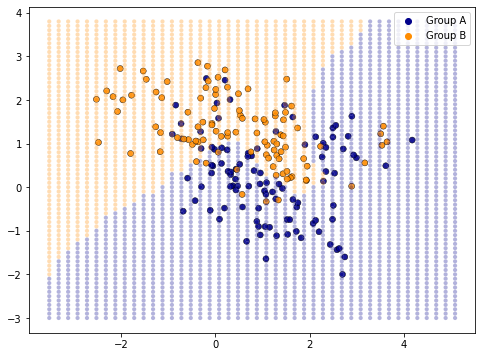

In [140]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers轉成整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
    hue = Group_name[y], palette = cmap_bold, \
        alpha = 0.9, edgecolor = 'black')
# KNN learning
K = 15
intrvl = 0.2 # grid interval
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl),np.arange(y_min, y_max, 0.1)) # grid points: matrices #xx為圍棋盤上每一個點的x座標,yy為圍棋盤上每一個點的ｙ座標矩陣
z = np.zeros(xx.size) # a vector for KNN predictions
for i in range(xx.size) :
    # tmp = np.tile([xx.ravel()[i], yy.ravel()[i]], (n, 1))#tile為複製#ravel為拉開#xx.ravel=x1(new),yy.ravel=x2(new)
    d=np.zeros(n)
    for j in range(n):
        x1=xx.ravel()[i]
        x2=yy.ravel()[i]
        d[j]=(x1-X[j,0])**2+(x2-X[j,1])**2
    # d=((tmp-X)**2).sum(axis=1)
    # d = np.linalg.norm(tmp - X, axis = 1) # n distances 
    idx = np.argsort(d) # sorting K distances#argsort可以對應回原本的位置而不是值
    z[i] = np.mean(y[idx[:K]]) # average K sorted y−values
    
z = [0 if i < 0.5 else 1 for i in z]
sns.scatterplot(x = xx.ravel(), y = yy.ravel(), size = 2,\
        markers = '.', palette = cmap_bold, hue = z, \
                alpha = 0.3, legend = False)

KNN套件法

Text(0.5, 1.0, 'Training error = 0.1550 for K = 15')

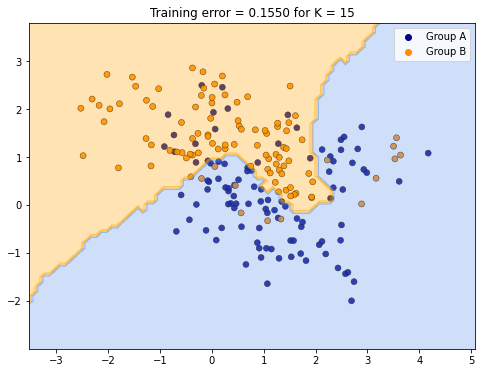

In [149]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
import matplotlib.colors as colors
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers轉成整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
    hue = Group_name[y], palette = cmap_bold, \
        alpha = 0.9, edgecolor = 'black')
K = 15
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
    np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange'])
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
plt.title('Training error = %.4f for K = %i' % (trainingErr,K))